<a href="https://colab.research.google.com/github/AnisAfiqah13/DATA-MANAGEMENT/blob/main/Anis_Assignment4_DataManagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Nur Anis Afiqah binti Mohd Khairul Anuar

Matrix No: P132838

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


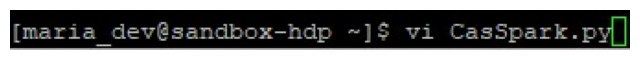

In [16]:
# @title In PuTTY, log into maria_dev and create your python code file (eg: CasSpark.py)
# Import the required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = '/content/drive/MyDrive/DataManagement/WhatsApp Image 2024-07-27 at 14.09.42_3e1efc8d.jpg'

# Open the image file
img = Image.open(image_path)

# Display the image in larger size
plt.figure(figsize=(8, 8))  # Set the figure size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

## Import the necessary libraries and run below code using Cassandra for Question 1,2,3


from pyspark.sql import SparkSession

from pyspark.sql.functions import col, avg, desc

from cassandra.cluster import Cluster

### #Initialize Spark session
spark = SparkSession.builder \
    .appName("MovieLens Analysis") \
    .config("spark.cassandra.connection.host", "localhost") \
    .getOrCreate()

### #Define the schema for the u.user file
user_schema = "user_id INT, age INT, gender STRING, occupation STRING, zip_code STRING"

### #Define the schema for the u.data file
ratings_schema = "user_id INT, movie_id INT, rating INT, timestamp LONG"

### #Load the u.user file into a DataFrame
users_df = spark.read.csv("/user/maria_dev/ml-100k/u.user", sep="|", schema=user_schema)

### #Load the u.data file into a DataFrame
ratings_df = spark.read.csv("/user/maria_dev/ml-100k/u.data", sep="\t", schema=ratings_schema)

### #Calculate the average rating for each movie
avg_ratings_df = ratings_df.groupBy("movie_id").agg(avg("rating").alias("avg_rating"))

### #Identify the top ten movies with the highest average ratings
top_movies_df = avg_ratings_df.orderBy(desc("avg_rating")).limit(10)
top_movies_df.show()

### #Find users who have rated at least 50 movies
user_ratings_count_df = ratings_df.groupBy("user_id").count().filter(col("count") >= 50)

user_genres_df = users_df.join(user_ratings_count_df, "user_id")
user_genres_df.show(10)

### #Write DataFrame to Cassandra
def write_to_cassandra(df, keyspace, table):
    df.write \
        .format("org.apache.spark.sql.cassandra") \
        .options(table=table, keyspace=keyspace) \
        .mode("append") \
        .save()

### #Define Cassandra keyspace and table
keyspace = "movielens"

table = "user_data"

### #Create keyspace and table in Cassandra
cluster = Cluster()
session = cluster.connect()
session.execute("CREATE KEYSPACE IF NOT EXISTS {} WITH replication = {{'class': 'SimpleStrategy', 'replication_factor': 1}};".format(keyspace))
session.execute("""
    CREATE TABLE IF NOT EXISTS {}.{} (
        user_id INT PRIMARY KEY,
        age INT,
        gender TEXT,
        occupation TEXT,
        zip_code TEXT
    );
""".format(keyspace, table))

### #Write users DataFrame to Cassandra
write_to_cassandra(users_df, keyspace, table)

### #Read the table back from Cassandra into a new DataFrame
new_users_df = spark.read \
    .format("org.apache.spark.sql.cassandra") \
    .options(table=table, keyspace=keyspace) \
    .load()
new_users_df.show(10)

### #Stop Spark session
spark.stop()

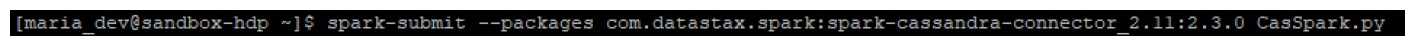

In [25]:
# @title Submit the script CasSpark.py
# Import the required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = '/content/drive/MyDrive/DataManagement/WhatsApp Image 2024-07-27 at 14.09.07_d44f4867.jpg'

# Open the image file
img = Image.open(image_path)

# Display the image in larger size
plt.figure(figsize=(18, 18))  # Set the figure size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

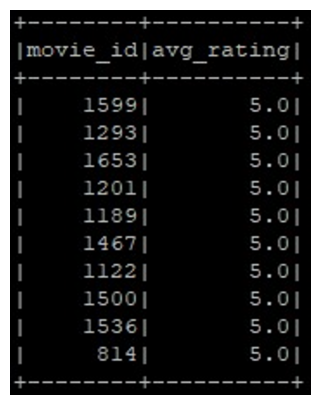

In [14]:
# @title Question 1 & 2: Average ratings for each movie (not shown all in output) but getting the Top 10 movie ID with ratings refer is calculated from average ratings conducted in earlier code.
# Import the required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = '/content/drive/MyDrive/DataManagement/Screenshot 2024-08-03 125240.png'

# Open the image file
img = Image.open(image_path)

# Display the image in larger size
plt.figure(figsize=(4,5))  # Set the figure size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

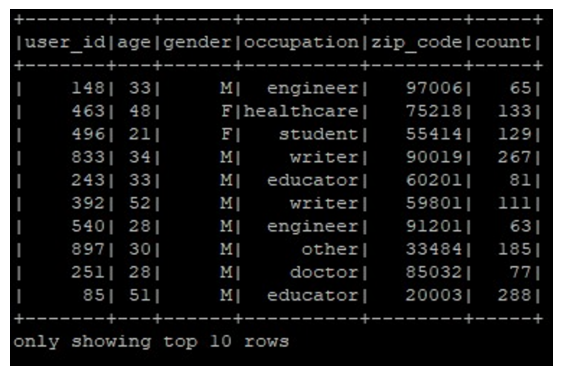

In [18]:
# @title Question 3: Find the users who have rated at least 50 movies
# Import the required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = '/content/drive/MyDrive/DataManagement/Screenshot 2024-08-03 132340.png'

# Open the image file
img = Image.open(image_path)

# Display the image in larger size
plt.figure(figsize=(7, 7))  # Set the figure size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

For Question 4 & 5, i'm using MongoDB.

Question 4: Find all the users with age that is less than 20 years old.

Question 5: Find all users who have the occupation “scientist” and their age is between 30 and 40 years old.

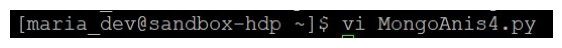

In [29]:
# @title First step, create a python code file as usual
# Import the required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = '/content/drive/MyDrive/DataManagement/WhatsApp Image 2024-07-27 at 15.21.57_b1190375.jpg'

# Open the image file
img = Image.open(image_path)

# Display the image in larger size
plt.figure(figsize=(7, 7))  # Set the figure size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Input below code to proceed, this is my forth attempt (as you can see in my file name) due to MongoDB compatibilty error with my laptop.  

### #-- coding: utf-8 --
from pyspark.sql import SparkSession
from pymongo import MongoClient
import sys

### #Initialize Spark session
spark = SparkSession.builder \
    .appName("MovieLens User Analysis with MongoDB") \
    .getOrCreate()

### #Print the Spark session details for debugging
print("Spark Session Initialized: ", spark)

### #Define the schema for the u.user file
user_schema = "user_id INT, age INT, gender STRING, occupation STRING, zip_code STRING"

### #Load the u.user file into a DataFrame
try:
    print("Attempting to read the u.user file from HDFS...")
    users_df = spark.read.option("delimiter", "|").schema(user_schema).csv("hdfs://sandbox-hdp.hortonworks.com:8020/user/maria_dev/anis/ml-100k/u.user")
    print("Data loaded successfully")
    users_df.show(5)  # Show some rows for debugging

except Exception as e:
    print("Error reading the file: ", e)
    print("Detailed error: ", e.java_exception.getMessage())
    spark.stop()
    sys.exit(1)

### #MongoDB setup

try:
    client = MongoClient('mongodb://localhost:27017/')
    db = client['movielens']
    collection = db['users']
    print("MongoDB connection established")

except Exception as e:
    print("Error connecting to MongoDB: ", e)
    spark.stop()
    sys.exit(1)

### #Insert users data into MongoDB

try:
    users_data = users_df.toPandas().to_dict(orient='records')
    collection.insert_many(users_data)
    print("Data inserted into MongoDB")

except Exception as e:
    print("Error inserting data into MongoDB: ", e)
    spark.stop()
    sys.exit(1)

### #Query users with age less than 20 years old

try:
    young_users = list(collection.find({"age": {"$lt": 20}}))
    print("Users with age less than 20:")
    for user in young_users[:10]:
        print(user)

except Exception as e:
    print("Error querying MongoDB: ", e)

### #Query users who have the occupation "scientist" and their age is between 30 and 40

try:
    scientists = list(collection.find({"occupation": "scientist", "age": {"$gte": 30, "$lte": 40}}))
    print("Scientists between age 30 and 40:")
    for user in scientists[:10]:
        print(user)

except Exception as e:
    print("Error querying MongoDB: ", e)

### #Stop Spark session
spark.stop()

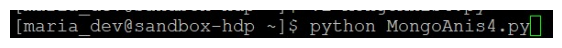

In [30]:
# @title Submit the python code file to run it in MongoDB environment.
# Import the required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = '/content/drive/MyDrive/DataManagement/WhatsApp Image 2024-07-27 at 15.22.30_4b4df3db.jpg'

# Open the image file
img = Image.open(image_path)

# Display the image in larger size
plt.figure(figsize=(7, 7))  # Set the figure size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

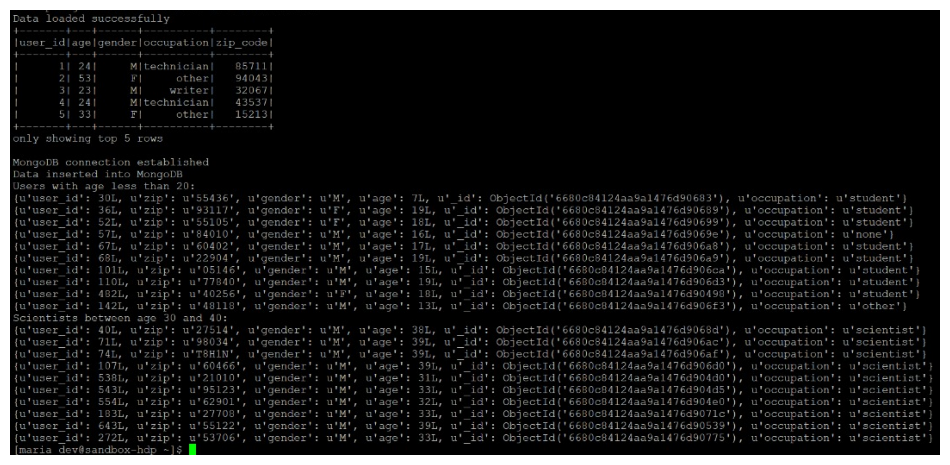

In [35]:
# @title Below are the output for Question 4 & 5
# Import the required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your image
image_path = '/content/drive/MyDrive/DataManagement/WhatsApp Image 2024-07-27 at 15.20.53_720e1584.jpg'

# Open the image file
img = Image.open(image_path)

# Display the image in larger size
plt.figure(figsize=(12, 12))  # Set the figure size (width, height) in inches
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### Summary

For questions 1, 2, 3 using Cassandra, we calculated the average rating for each movie, identified the top ten movies with the highest average ratings, and found users who have rated at least 50 movies and their favourite movie genres.

For questions 4, 5 using MongoDB, we queried users with age less than 20 years old and identified users who are scientists and their age is between 30 and 40 years old